<a href="https://colab.research.google.com/github/PY-ANI/Sudoku-Scanner/blob/main/my_own_obj_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0,0].dtype

dtype('float64')

In [ ]:
# X_train[0]/255
x_train = x_train.reshape(len(x_train),28*28)/255
x_test = x_test.reshape(len(x_test),28*28)/255

In [ ]:
y_test.shape
np_utils.to_categorical(y_test)[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
data = pd.read_csv("/content/data_sheet.csv",header=None,delimiter=',')
data = data.dropna().to_numpy()
data.shape

(1617, 901)

In [ ]:
pixel = data[:,1:]
# pixel = pixel.reshape(1617,30,30,1)

In [ ]:
label = data[:,0].astype(np.uint8)
label.shape

(1617,)

In [ ]:
label = np_utils.to_categorical(label)
# label[0,0]

In [ ]:
pixel = pixel/255

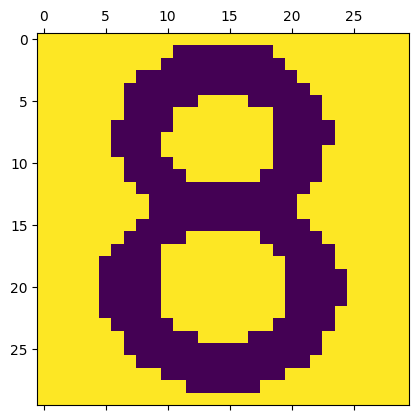

In [ ]:
t = pixel[0].reshape(30,30)
plt.matshow(t)

In [ ]:
pixel = np.concatenate((pixel,X_train))
label = np.concatenate((label,y_train))

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(900,), activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(30, 30, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(pixel, label,validation_data=(pixel,label),epochs=10, batch_size=200)

Epoch 1/10
9/9 [==============================] - 0s 50ms/step - loss: 0.0835 - accuracy: 0.9988 - val_loss: 0.0774 - val_accuracy: 0.9988
Epoch 2/10
9/9 [==============================] - 0s 21ms/step - loss: 0.0750 - accuracy: 0.9988 - val_loss: 0.0694 - val_accuracy: 0.9988
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0680 - accuracy: 0.9988 - val_loss: 0.0632 - val_accuracy: 0.9988
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0609 - accuracy: 0.9988 - val_loss: 0.0577 - val_accuracy: 0.9988
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.0556 - accuracy: 0.9988 - val_loss: 0.0523 - val_accuracy: 0.9988
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0510 - accuracy: 0.9988 - val_loss: 0.0485 - val_accuracy: 0.9988
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0472 - accuracy: 0.9988 - val_loss: 0.0451 - val_accuracy: 0.9988
Epoch 8/10
9/9 [===========

In [ ]:
model.input_shape

(None, 900)

In [ ]:
model.fit(pixel,label, epochs=5)

Epoch 1/5
51/51 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.0000e+00
Epoch 2/5
51/51 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.0000e+00
Epoch 3/5
51/51 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.0000e+00
Epoch 4/5
51/51 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.0000e+00
Epoch 5/5
51/51 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.0000e+00


In [ ]:
pre = model.predict(pixel)

51/51 [==============================] - 0s 1ms/step


In [ ]:
model.save("basic_model",save_format="h5")

In [ ]:
mdl = load_model("basic_model")

In [ ]:
model.summary()

In [ ]:
pred = mdl.predict(pixel[:10])

1/1 [==============================] - 0s 57ms/step


In [ ]:
np.argmax(pred[0])

8

In [ ]:
label[0]

8

In [ ]:
arr = []
r,w=0,0
for i in range(len(pre)):
  if label[i] == np.argmax(pre[i]):r+=1
  else: w+=1;print(i,label[i],np.argmax(pre[i]));arr.append(pixel[i].reshape((30,30)))

print(r,w)

112 2 1
113 3 2
1615 2


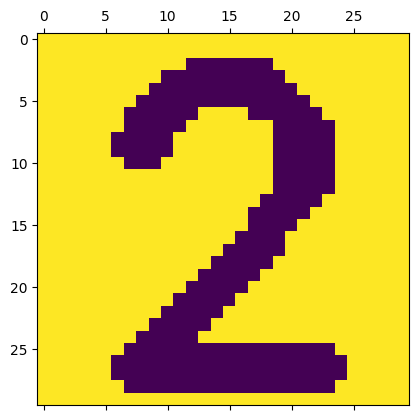

In [ ]:
plt.matshow(arr[1])

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(pre[0])

7

In [ ]:
px = [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255,   0, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],
 [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 255, 255, 255, 255,],]
px = (255-np.array(px))/255
px = np.array([px.flatten()])

In [ ]:
px.shape

(1, 784)

In [ ]:
model.input_shape

(None, 784)

In [ ]:
p = model.predict(px)

1/1 [==============================] - 0s 26ms/step


In [ ]:
np.argmax(p)

6